In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sys, os, time, csv, cv2

# Settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision = 5, suppress = True)

In [86]:
normal_train = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/normal_train_8020.csv')
normal_test = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/normal_test_8020.csv')

smurf_train = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/smurf_train_8020.csv')
smurf_test = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/smurf_test_8020.csv')

ip_train = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/ip_train_8020.csv')
ip_test = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/ip_test_8020.csv')

port_train = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/port_train_8020.csv')
port_test = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/port_test_8020.csv')

nmap_train = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/nmap_train_8020.csv')
nmap_test = pd.read_csv('/Users/ryan/NSL CNN/2d-cnn/datasets/80-20/v2/nmap_test_8020.csv')

In [87]:
normal_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,icmp,tcp,udp,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,private,remote_job,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,attack_type
0,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,66.86888,106.79061,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,2.55000,255.00000,254.00000,255.00000,2.55000,2.55000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,normal
1,0.00000,0.00005,0.00013,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.98826,6.98630,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,35.70000,68.00000,255.00000,255.00000,0.00000,2.55000,5.10000,0.00000,0.00000,0.00000,2.55000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,normal
2,0.13255,0.00001,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.49706,2.99413,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,84.15000,255.00000,240.00000,239.70000,5.10000,15.30000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,normal
3,0.00000,0.00006,0.00277,0.00000,0.00000,0.00000,0.00000,0.00000,255.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0

In [88]:
dataframes = [normal_train, normal_test, smurf_train, smurf_test, ip_train, ip_test, port_train, port_test, nmap_train, nmap_test]
for df in dataframes:
    df.drop(df.columns[df.columns.str.contains('attack_type')], 1, inplace=True)

In [89]:
normal_train = normal_train.to_numpy()
normal_test = normal_test.to_numpy()

smurf_train = smurf_train.to_numpy()
smurf_test = smurf_test.to_numpy()

ip_train = ip_train.to_numpy()
ip_test = ip_test.to_numpy()

port_train = port_train.to_numpy()
port_test = port_test.to_numpy()

nmap_train = nmap_train.to_numpy()
nmap_test = nmap_test.to_numpy()


normal_train = np.ravel(normal_train, order = 'F')
normal_test = np.ravel(normal_test, order = 'F')

smurf_train = np.ravel(smurf_train, order = 'F')
smurf_test = np.ravel(smurf_test, order = 'F')

ip_train = np.ravel(ip_train, order = 'F')
ip_test = np.ravel(ip_test, order = 'F')

port_train = np.ravel(port_train, order = 'F')
port_test = np.ravel(port_test, order = 'F')

nmap_train = np.ravel(nmap_train, order = 'F')
nmap_test = np.ravel(nmap_test, order = 'F')

print(f'Normal train shape: {normal_train.shape}\tNormal test shape: {normal_test.shape}')
print(f'smurf train shape: {smurf_train.shape}\tsmurf test shape: {smurf_test.shape}')
print(f'ip train shape: {ip_train.shape}\tip test shape: {ip_test.shape}')
print(f'port train shape: {port_train.shape}\tport test shape: {port_test.shape}')
print(f'nmap train shape: {nmap_train.shape}\tnmap test shape: {nmap_test.shape}')

Normal train shape: (7017726,)	Normal test shape: (1754460,)
smurf train shape: (497154,)	smurf test shape: (124374,)
ip train shape: (22267392,)	ip test shape: (5566962,)
port train shape: (7284372,)	port test shape: (1821150,)
nmap train shape: (261516,)	nmap test shape: (65436,)


## Adding padding

# ---------- Binary method ----------

In [49]:
train_attack_padding = -attack_train.size % 1024
train_normal_padding = -normal_train.size % 1024

if train_attack_padding:
    attack_train = np.concatenate((attack_train, np.zeros(train_attack_padding, dtype = attack_train.dtype)))

if train_normal_padding:
    normal_train = np.concatenate((normal_train, np.zeros(train_normal_padding, dtype = normal_train.dtype)))


In [50]:
test_attack_padding = -attack_test.size % 1024
test_normal_padding = -normal_test.size % 1024

if test_attack_padding:
    attack_test = np.concatenate((attack_test, np.zeros(test_attack_padding, dtype = attack_test.dtype)))

if test_normal_padding:
    normal_test = np.concatenate((normal_test, np.zeros(test_normal_padding, dtype = normal_test.dtype)))

In [51]:
attack_train = attack_train.reshape(-1, 32, 32, 1)
normal_train = normal_train.reshape(-1, 32, 32, 1)
attack_test = attack_test.reshape(-1, 32, 32, 1)
normal_test = normal_test.reshape(-1, 32, 32, 1)

print(f'Attack train shape: {attack_train.shape}\nNormal train shape: {normal_train.shape}')
print(f'Attack test shape: {attack_test.shape}\nNormal test shape: {normal_test.shape}')

Attack train shape: (4727, 32, 32, 1)
Normal train shape: (5140, 32, 32, 1)
Attack test shape: (3152, 32, 32, 1)
Normal test shape: (3427, 32, 32, 1)


# --------------------

In [90]:
train_normal_padding = -normal_train.size % 4096
test_normal_padding = -normal_test.size % 4096

if train_normal_padding:
    normal_train = np.concatenate((normal_train, np.zeros(train_normal_padding, dtype = normal_train.dtype)))
    
if test_normal_padding:
    normal_test = np.concatenate((normal_test, np.zeros(test_normal_padding, dtype = normal_test.dtype)))

    

train_smurf_padding = -smurf_train.size % 4096
test_smurf_padding = -smurf_test.size % 4096

if train_smurf_padding:
    smurf_train = np.concatenate((smurf_train, np.zeros(train_smurf_padding, dtype = smurf_train.dtype)))
    
if test_smurf_padding:
    smurf_test = np.concatenate((smurf_test, np.zeros(test_smurf_padding, dtype = smurf_test.dtype)))
    
    
    
train_ip_padding = -ip_train.size % 4096
test_ip_padding = -ip_test.size % 4096

if train_ip_padding:
    ip_train = np.concatenate((ip_train, np.zeros(train_ip_padding, dtype = ip_train.dtype)))
    
if test_normal_padding:
    ip_test = np.concatenate((ip_test, np.zeros(test_ip_padding, dtype = ip_test.dtype)))
    
    
    
train_port_padding = -port_train.size % 4096
test_port_padding = -port_test.size % 4096

if train_port_padding:
    port_train = np.concatenate((port_train, np.zeros(train_port_padding, dtype = port_train.dtype)))
    
if test_port_padding:
    port_test = np.concatenate((port_test, np.zeros(test_port_padding, dtype = port_test.dtype)))
    
    
    
train_nmap_padding = -nmap_train.size % 4096
test_nmap_padding = -nmap_test.size % 4096

if train_nmap_padding:
    nmap_train = np.concatenate((nmap_train, np.zeros(train_nmap_padding, dtype = nmap_train.dtype)))
    
if test_nmap_padding:
    nmap_test = np.concatenate((nmap_test, np.zeros(test_nmap_padding, dtype = nmap_test.dtype)))

In [91]:
normal_train = normal_train.reshape(-1, 64, 64, 1)
normal_test = normal_test.reshape(-1, 64, 64, 1)
smurf_train = smurf_train.reshape(-1, 64, 64, 1)
smurf_test = smurf_test.reshape(-1, 64, 64, 1)
ip_train = ip_train.reshape(-1, 64, 64, 1)
ip_test = ip_test.reshape(-1, 64, 64, 1)
port_train = port_train.reshape(-1, 64, 64, 1)
port_test = port_test.reshape(-1, 64, 64, 1)
nmap_train = nmap_train.reshape(-1, 64, 64, 1)
nmap_test = nmap_test.reshape(-1, 64, 64, 1)

print(f'Normal train shape: {normal_train.shape}\tNormal test shape: {normal_test.shape}')
print(f'smurf train shape: {smurf_train.shape}\tsmurf test shape: {smurf_test.shape}')
print(f'ip train shape: {ip_train.shape}\tip test shape: {ip_test.shape}')
print(f'port train shape: {port_train.shape}\tport test shape: {port_test.shape}')
print(f'nmap train shape: {nmap_train.shape}\tnmap test shape: {nmap_test.shape}')

Normal train shape: (1714, 64, 64, 1)	Normal test shape: (429, 64, 64, 1)
smurf train shape: (122, 64, 64, 1)	smurf test shape: (31, 64, 64, 1)
ip train shape: (5437, 64, 64, 1)	ip test shape: (1360, 64, 64, 1)
port train shape: (1779, 64, 64, 1)	port test shape: (445, 64, 64, 1)
nmap train shape: (64, 64, 64, 1)	nmap test shape: (16, 64, 64, 1)


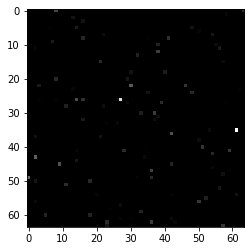

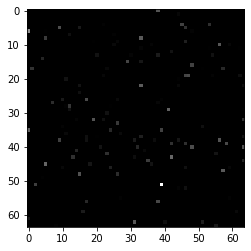

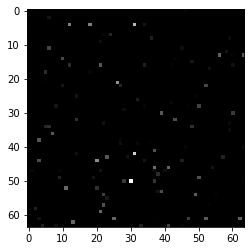

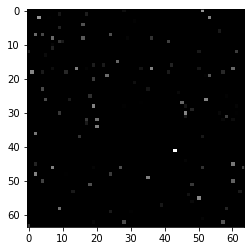

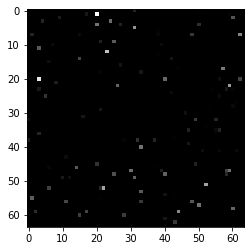

In [92]:
for t in range(0, 5):
    plt.imshow(normal_train[t], cmap = 'gray')
    plt.show()
    
    # cv2.imwrite(CUR_DIR + f'/image_before_equ_{t}.jpg', normal_imgs_tr[t])

## Creating the images

In [93]:
!pwd

/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/70-30/test_nmap


In [121]:
os.chdir('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/80-20/train_port')
path = '/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/80-20/train_port'

In [122]:
## create the before images
for t in range(0, len(port_train)):
#     plt.imshow(normal_imgs[t], cmap = 'gray')
#     plt.show()
    
    cv2.imwrite(os.path.join(path, f'train_port_before_{t}.jpg'), port_train[t])
#     cv2.imwrite(f'image_before_{t}.bmp', normal_imgs[t])

In [123]:
## loop through the before images, perform equalisation and save images to same directory
## ensure CWD is the directory saving the images to

for file in os.listdir(path):
    for i in range(0, port_train.shape[0]):
        pre_equ = cv2.imread(f'train_port_before_{i}.jpg', 0)
        # print(file)
        equalised = cv2.equalizeHist(pre_equ)
        cv2.imwrite(f'train_port_equ_{i}.jpg', equalised)

KeyboardInterrupt: 